In [2]:

!pip install --upgrade scikit-learn==1.4.0 imbalanced-learn==0.12.0 --quiet
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 106.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 15.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


2025-04-22 17:26:47.909343: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745342808.151346      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745342808.227942      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ismailpromus/skin-diseases-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/skin-diseases-image-dataset


In [ ]:
! cp -r /root/.cache/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES

In [4]:
import os
print("Root folder:")
print(os.listdir("/kaggle/input"))

# Check inside your dataset folder
print("\nInside your dataset:")
print(os.listdir("/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES"))


Root folder:
['skin-diseases-image-dataset']

Inside your dataset:
['1. Eczema 1677', '10. Warts Molluscum and other Viral Infections - 2103', '4. Basal Cell Carcinoma (BCC) 3323', '7. Psoriasis pictures Lichen Planus and related diseases - 2k', '5. Melanocytic Nevi (NV) - 7970', '9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k', '3. Atopic Dermatitis - 1.25k', '6. Benign Keratosis-like Lesions (BKL) 2624', '8. Seborrheic Keratoses and other Benign Tumors - 1.8k', '2. Melanoma 15.75k']


In [5]:
import os

base_path = "/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES"

# Mapping from real folder names → category labels you want
folder_to_label = {
    '1. Eczema 1677': 'Eczema',
    '2. Melanoma 15.75k': 'Melanoma',
    '3. Atopic Dermatitis - 1.25k': 'Atopic',
    '4. Basal Cell Carcinoma (BCC) 3323': 'Basal',
    '5. Melanocytic Nevi (NV) - 7970': 'Melanocytic',
    '6. Benign Keratosis-like Lesions (BKL) 2624': 'Benign',
    '7. Psoriasis pictures Lichen Planus and related diseases - 2k': 'Psoriasis',
    '8. Seborrheic Keratoses and other Benign Tumors - 1.8k': 'Seborrheic',
    '9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k': 'Tinea',
    '10. Warts Molluscum and other Viral Infections - 2103': 'Warts'
}

image_paths = []
labels = []

for folder_name, label in folder_to_label.items():
    category_path = os.path.join(base_path, folder_name)
    if not os.path.exists(category_path):
        print(f"Folder not found: {category_path}")
        continue
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(label)

In [6]:
df = pd.DataFrame({
 "image_path": image_paths,
 "label": labels
})

In [7]:
df.head()

,image_path,label
0,/kaggle/input/skin-diseases-image-dataset/IMG_...,Eczema
1,/kaggle/input/skin-diseases-image-dataset/IMG_...,Eczema
2,/kaggle/input/skin-diseases-image-dataset/IMG_...,Eczema
3,/kaggle/input/skin-diseases-image-dataset/IMG_...,Eczema
4,/kaggle/input/skin-diseases-image-dataset/IMG_...,Eczema


In [8]:
df.tail()

,image_path,label
27148,/kaggle/input/skin-diseases-image-dataset/IMG_...,Warts
27149,/kaggle/input/skin-diseases-image-dataset/IMG_...,Warts
27150,/kaggle/input/skin-diseases-image-dataset/IMG_...,Warts
27151,/kaggle/input/skin-diseases-image-dataset/IMG_...,Warts
27152,/kaggle/input/skin-diseases-image-dataset/IMG_...,Warts


In [9]:
df.shape

(27153, 2)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

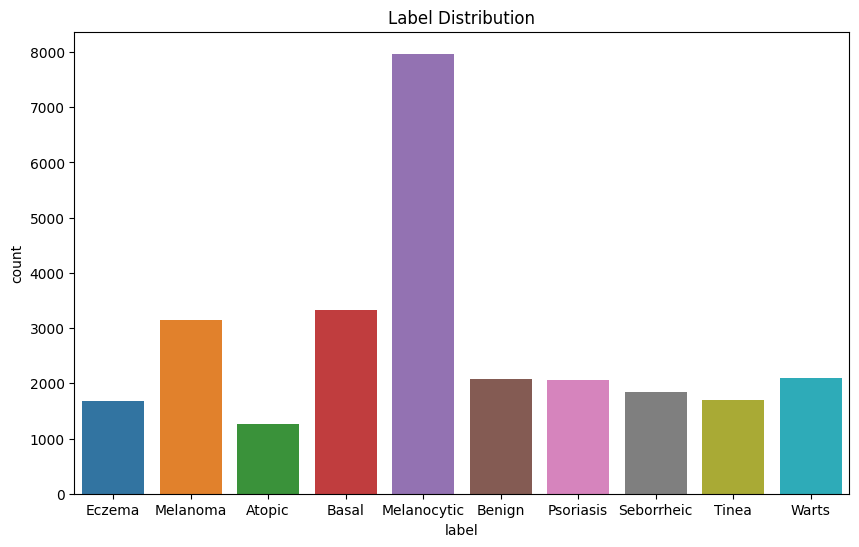

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_label_distribution(df):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x="label")
    plt.title("Label Distribution")
    plt.show()

visualize_label_distribution(df)

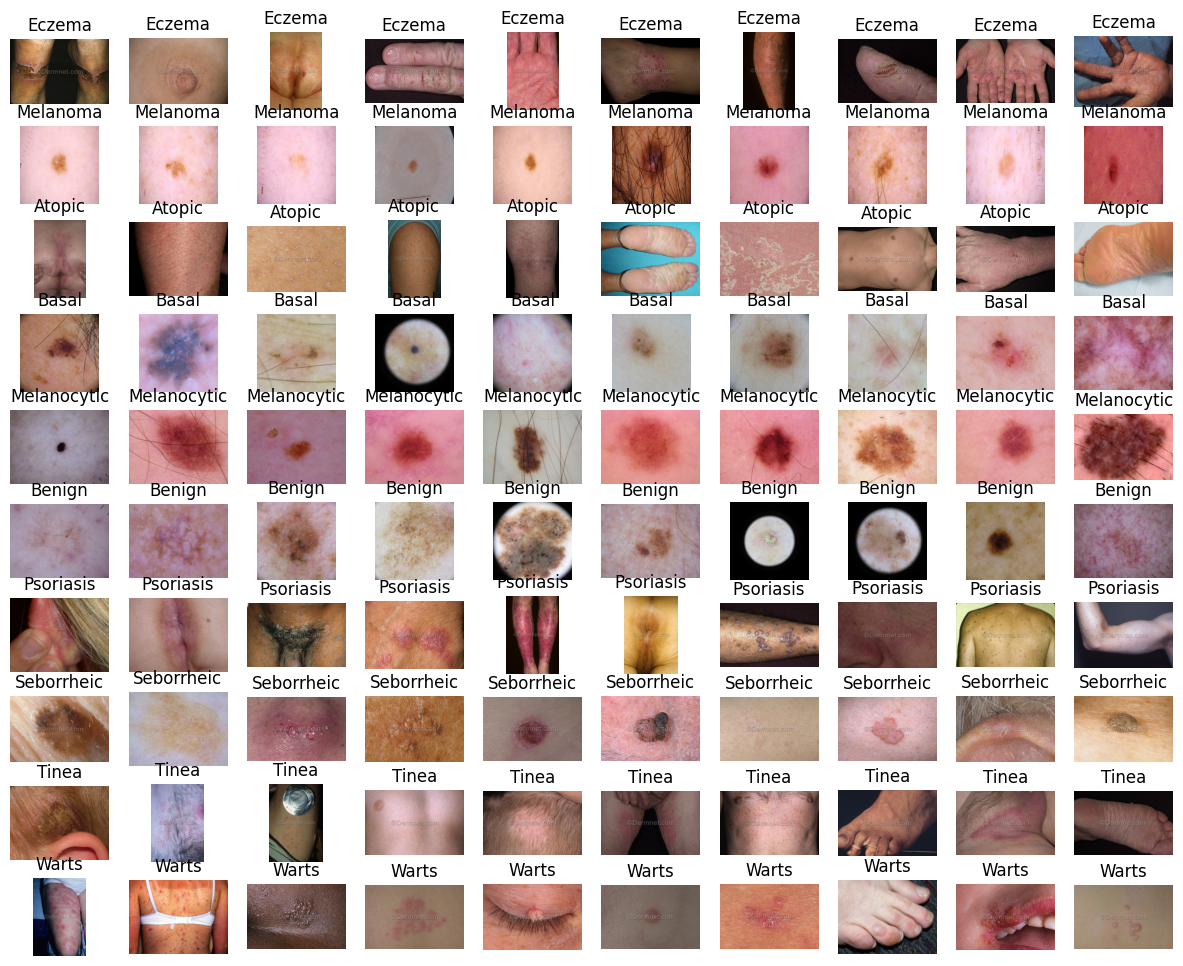

In [13]:
import cv2
import matplotlib.pyplot as plt

num_images = 10
categories = df['label'].unique()  # This line defines categories
plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]
    for j, img_path in enumerate(category_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['label'])
df = df[['image_path', 'category_encoded']]
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']],
df['category_encoded'])
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
3    7970
5    7970
0    7970
1    7970
4    7970
2    7970
6    7970
7    7970
8    7970
9    7970
Name: count, dtype: int64


In [15]:
df_resampled

,image_path,category_encoded
0,/kaggle/input/skin-diseases-image-dataset/IMG_...,3
1,/kaggle/input/skin-diseases-image-dataset/IMG_...,3
2,/kaggle/input/skin-diseases-image-dataset/IMG_...,3
3,/kaggle/input/skin-diseases-image-dataset/IMG_...,3
4,/kaggle/input/skin-diseases-image-dataset/IMG_...,3
...,...,...
79695,/kaggle/input/skin-diseases-image-dataset/IMG_...,9
79696,/kaggle/input/skin-diseases-image-dataset/IMG_...,9
79697,/kaggle/input/skin-diseases-image-dataset/IMG_...,9
79698,/kaggle/input/skin-diseases-image-dataset/IMG_...,9


In [22]:
df_resampled['category_encoded'] =df_resampled['category_encoded'].astype(str)

In [17]:
train_df_new, temp_df_new = train_test_split(
 df_resampled,
 train_size=0.8,
 shuffle=True,
 random_state=42,
 stratify=df_resampled['category_encoded']
)
valid_df_new, test_df_new = train_test_split(
 temp_df_new,
 test_size=0.5,
 shuffle=True,
 random_state=42,
 stratify=temp_df_new['category_encoded']
)
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)
train_gen_new = tr_gen.flow_from_dataframe(
 train_df_new,
 x_col='image_path',
 y_col='category_encoded',
 target_size=img_size,
 class_mode='sparse',
 color_mode='rgb',
 shuffle=True,
 batch_size=batch_size
)
valid_gen_new = ts_gen.flow_from_dataframe(
 valid_df_new,
 x_col='image_path',
 y_col='category_encoded',
 target_size=img_size,
 class_mode='sparse',
 color_mode='rgb',
 shuffle=True,
 batch_size=batch_size
)
test_gen_new = ts_gen.flow_from_dataframe(test_df_new,x_col='image_path',
 y_col='category_encoded',
 target_size=img_size,
 class_mode='sparse',
 color_mode='rgb',
 shuffle=False,
 batch_size=batch_size
)

Found 63760 validated image filenames belonging to 10 classes.
Found 7970 validated image filenames belonging to 10 classes.
Found 7970 validated image filenames belonging to 10 classes.


In [23]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(df_resampled, train_size=0.7, random_state=42, stratify=df_resampled['category_encoded'])
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['category_encoded'])


In [24]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [25]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            print("GPU is set for TensorFlow")
    except RuntimeError as e: # Fixed indentation here
        print(e)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

GPU is set for TensorFlow


In [26]:
class PatchEmbedding(layers.Layer):
  def __init__(self, patch_size, embed_dim):
    super(PatchEmbedding, self).__init__()
    self.patch_size = patch_size
    self.embed_dim = embed_dim
    self.proj = layers.Conv2D(embed_dim, patch_size, strides=patch_size,
   padding='valid')
  def call(self, images):
    patches = self.proj(images)
    patches = tf.reshape(patches, (tf.shape(patches)[0], -1,self.embed_dim))
    return patches

In [27]:
class MultiHeadSelfAttention(layers.Layer):
  def __init__(self, num_heads, embed_dim):
    super(MultiHeadSelfAttention, self).__init__()
    self.attention = layers.MultiHeadAttention(num_heads=num_heads,key_dim=embed_dim)
  def call(self, inputs):
    return self.attention(inputs, inputs)
class TransformerBlock(layers.Layer):
  def __init__(self, embed_dim, num_heads, mlp_dim, dropout_rate):
    super(TransformerBlock, self).__init__()
    self.attention = MultiHeadSelfAttention(num_heads, embed_dim)
    self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
    self.mlp = tf.keras.Sequential([
    layers.Dense(mlp_dim, activation='gelu'),
    layers.Dropout(dropout_rate),
    layers.Dense(embed_dim),
    layers.Dropout(dropout_rate)
 ])
  def call(self, inputs):
    x = self.layernorm1(inputs)
    x = self.attention(x)
    x = x + inputs
    x = self.layernorm2(x)
    x = self.mlp(x)
    return x + inputs

In [28]:
class VisionTransformer(tf.keras.Model):
  def __init__(self, image_size, patch_size, embed_dim, num_heads,num_blocks, mlp_dim, num_classes, dropout_rate=0.1):
    super(VisionTransformer, self).__init__()
    self.patch_embed = PatchEmbedding(patch_size, embed_dim)

    height, width, _ = image_size
    num_patches = (height // patch_size) * (width // patch_size)

    self.pos_embed = self.add_weight(name="pos_embed",shape=(1, num_patches + 1, embed_dim),initializer=tf.initializers.RandomNormal(stddev=0.02),trainable=True
 )

    self.cls_token = self.add_weight(name="cls_token", shape=(1, 1, embed_dim),initializer=tf.initializers.RandomNormal(stddev=0.02),
    trainable=True )

    self.dropout = layers.Dropout(dropout_rate)
    self.transformer_blocks = [TransformerBlock(embed_dim, num_heads,mlp_dim, dropout_rate) for _ in range(num_blocks)]
    self.layernorm = layers.LayerNormalization(epsilon=1e-6)
    self.classifier = layers.Dense(num_classes, activation='softmax')
  def call(self, images):
    batch_size = tf.shape(images)[0]
    patches = self.patch_embed(images)

    cls_tokens = tf.repeat(self.cls_token, repeats=batch_size, axis=0)
    x = tf.concat([cls_tokens, patches], axis=1)
    pos_embed = tf.repeat(self.pos_embed, repeats=batch_size, axis=0)
    x = x + pos_embed
    x = self.dropout(x)

    for block in self.transformer_blocks:
      x = block(x)

    x = self.layernorm(x)
    cls_token_final = x[:, 0]
    return self.classifier(cls_token_final)

In [29]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l1, l2
from sklearn.utils.class_weight import compute_class_weight

In [30]:
# Add these imports at the top of your code
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, auc
from itertools import cycle
from tensorflow.keras import backend as K
import tensorflow as tf  # Make sure to import TensorFlow

# Add these custom metric functions
def precision(y_true, y_pred):
    y_pred = K.argmax(y_pred, axis=-1)
    y_true = K.cast(y_true, tf.float32)  # Use tf.float32 instead of K.float32
    y_pred = K.cast(y_pred, tf.float32)  # Use tf.float32 instead of K.float32
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    y_pred = K.argmax(y_pred, axis=-1)
    y_true = K.cast(y_true, tf.float32)  # Use tf.float32 instead of K.float32
    y_pred = K.cast(y_pred, tf.float32)  # Use tf.float32 instead of K.float32
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * ((prec * rec) / (prec + rec + K.epsilon()))


In [31]:
image_size = (224, 224, 3)
patch_size = 16
embed_dim = 384      #256
num_heads = 12   #8
num_blocks = 8    #6
mlp_dim = 384   #256
num_classes = 10
dropout_rate =  0.2  #0.1
learning_rate = 1e-5
vit_model = VisionTransformer(image_size=image_size,patch_size=patch_size,embed_dim=embed_dim,
 num_heads=num_heads,
num_blocks=num_blocks,
mlp_dim=mlp_dim,
num_classes=num_classes,dropout_rate=dropout_rate)

vit_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),loss='sparse_categorical_crossentropy',metrics=['accuracy',precision, recall,f1])
epochs = 35
# Custom learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    decay_steps=len(train_gen_new)*35 
)


from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

I0000 00:00:1745343088.500104      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [32]:
history1 = vit_model.fit(train_gen_new, epochs=epochs, batch_size = 32,validation_data=valid_gen_new,callbacks=[early_stopping])

Epoch 1/35


I0000 00:00:1745343133.524353     109 service.cc:148] XLA service 0x7b40500022b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745343133.525303     109 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1745343136.273580     109 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1745343144.396380     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3985/3985 ━━━━━━━━━━━━━━━━━━━━ 1397s 339ms/step - accuracy: 0.2991 - f1: 0.9157 - loss: 1.8443 - precision: 0.9069 - recall: 0.9394 - val_accuracy: 0.4748 - val_f1: 0.9248 - val_loss: 1.3341 - val_precision: 0.9287 - val_recall: 0.9250
Epoch 2/35
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 1337s 335ms/step - accuracy: 0.5154 - f1: 0.9318 - loss: 1.2542 - precision: 0.9342 - recall: 0.9347 - val_accuracy: 0.6136 - val_f1: 0.9478 - val_loss: 1.0250 - val_precision: 0.9531 - val_recall: 0.9459
Epoch 3/35
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 1332s 334ms/step - accuracy: 0.6577 - f1: 0.9557 - loss: 0.9255 - precision: 0.9600 - recall: 0.9547 - val_accuracy: 0.7269 - val_f1: 0.9652 - val_loss: 0.7407 - val_precision: 0.9733 - val_recall: 0.9597
Epoch 4/35
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 1333s 334ms/step - accuracy: 0.7636 - f1: 0.9742 - loss: 0.6486 - precision: 0.9769 - recall: 0.9734 - val_accuracy: 0.8072 - val_f1: 0.9792 - val_loss: 0.5496 - val_precision: 0.9811 - val_recall: 0.9789
Epoch 5/35
3985/3985 ━━

In [33]:

vit_model.save('vit_model_saved_model.keras')



In [35]:
#vit_model.save('vit_model_saved_model.h5')

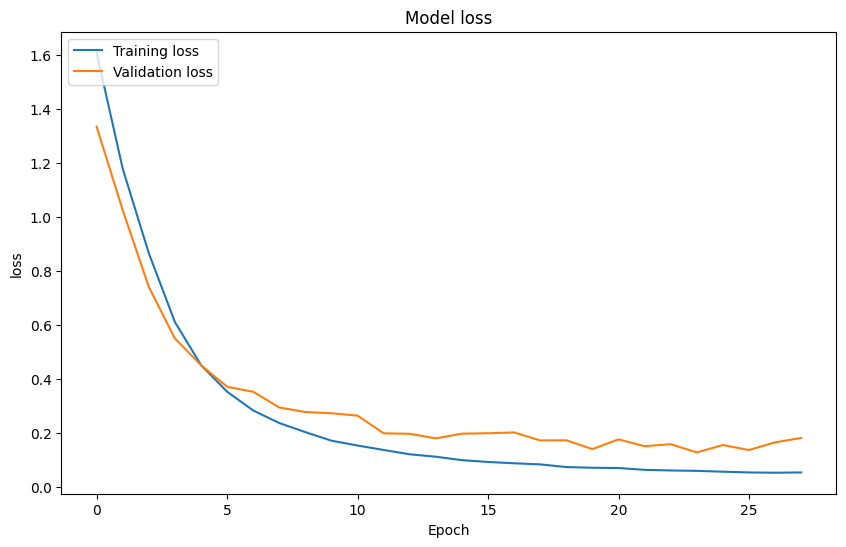

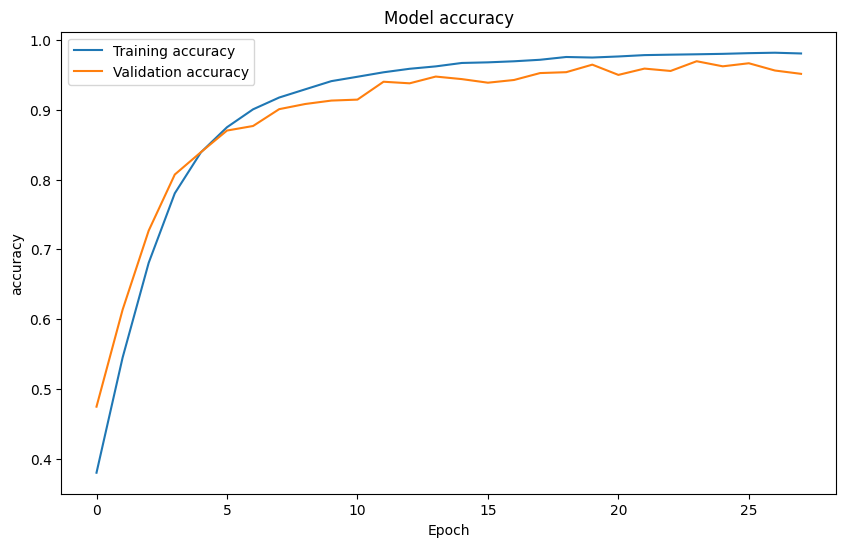

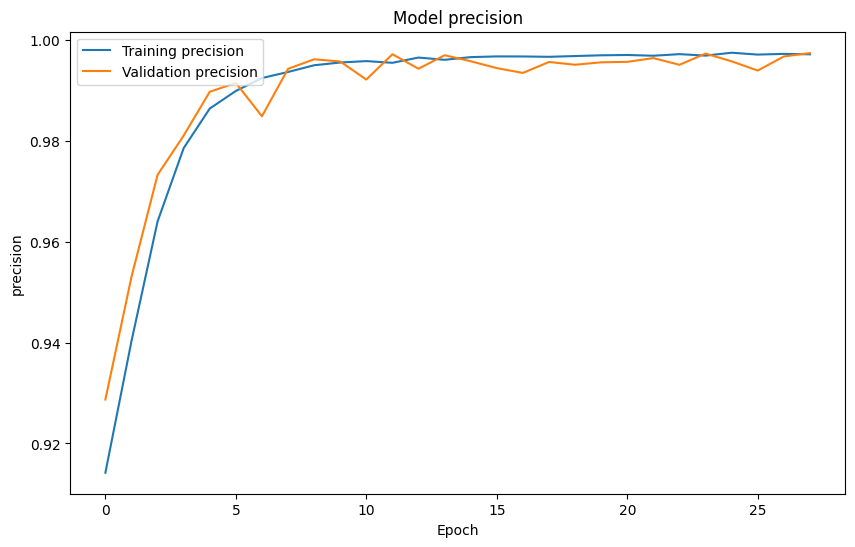

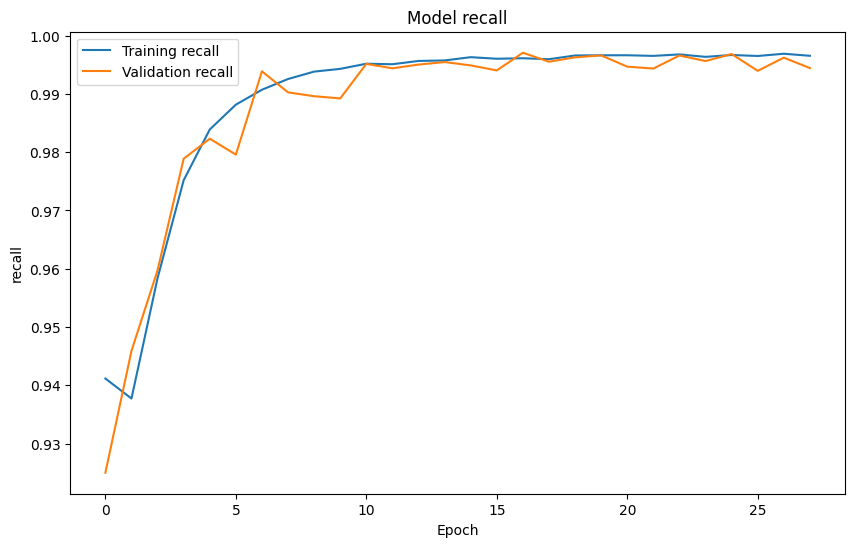

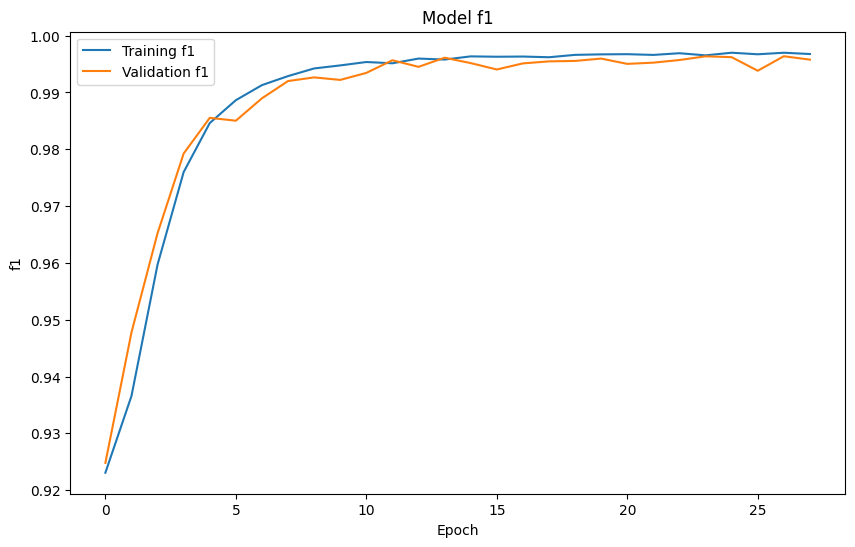

In [36]:
# After training, plot all the new metrics
def plot_training_metrics(history):
    metrics = ['loss', 'accuracy', 'precision', 'recall', 'f1']
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        plt.plot(history.history[metric], label=f'Training {metric}')
        if f'val_{metric}' in history.history:
            plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
        plt.title(f'Model {metric}')
        plt.ylabel(metric)
        plt.xlabel('Epoch')
        plt.legend(loc='upper left')
        plt.show()

plot_training_metrics(history1)

# Add precision-recall curve and ROC curve visualizations
def plot_precision_recall_curve(test_labels, predictions, class_names):
    # Convert labels to one-hot encoding
    y_test = tf.keras.utils.to_categorical(test_labels, num_classes=len(class_names))

    precision = dict()
    recall = dict()
    average_precision = dict()

    for i in range(len(class_names)):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], predictions[:, i])
        average_precision[i] = auc(recall[i], precision[i])

    # Plot Precision-Recall curve for each class
    plt.figure(figsize=(10, 8))
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal',
                   'red', 'blue', 'green', 'yellow', 'purple'])

    for i, color in zip(range(len(class_names)), colors):
        plt.plot(recall[i], precision[i], color=color, lw=2,
                 label='Precision-recall for class {0} (AP = {1:0.2f})'
                 ''.format(class_names[i], average_precision[i]))

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve for each class')
    plt.legend(loc="best")
    plt.show()

def plot_roc_curve(test_labels, predictions, class_names):
    # Convert labels to one-hot encoding
    y_test = tf.keras.utils.to_categorical(test_labels, num_classes=len(class_names))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 8))
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal',
                   'red', 'blue', 'green', 'yellow', 'purple'])

    for i, color in zip(range(len(class_names)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (AUC = {1:0.2f})'
                 ''.format(class_names[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for each class')
    plt.legend(loc="lower right")
    plt.show()



  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━

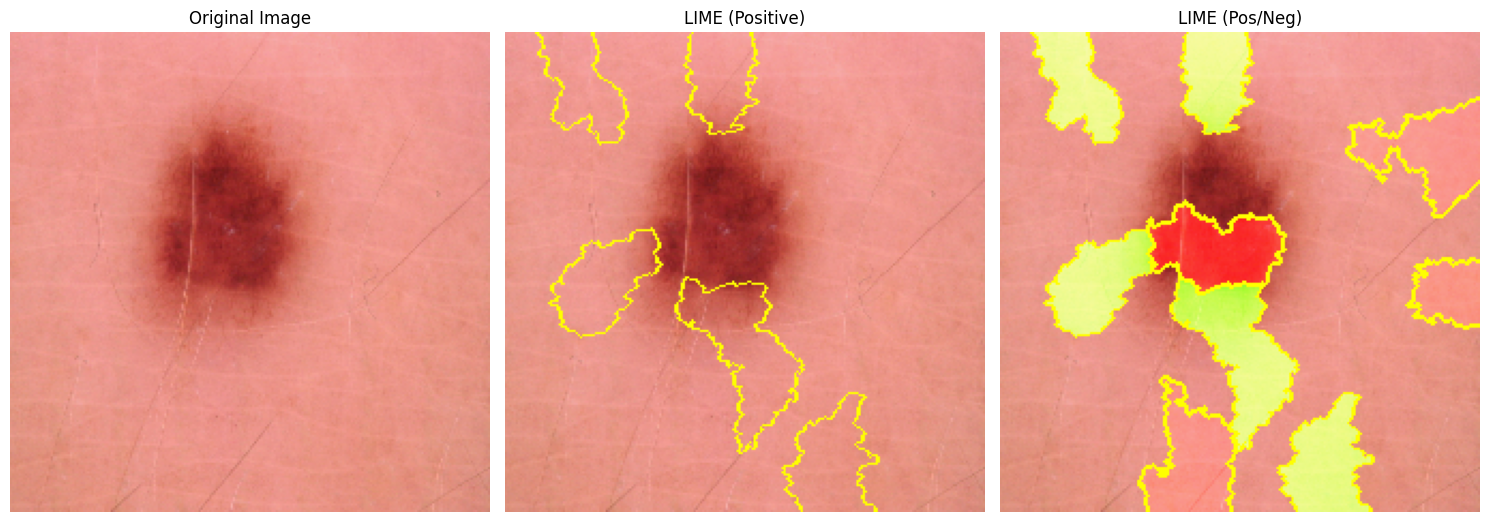

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: 4
True:      4


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

# 0. Make sure these already exist:
#    vit_model, test_df_new, test_gen_new, img_size

# 1. Create LIME explainer
explainer = lime_image.LimeImageExplainer(random_state=42)

# 2. Define prediction function for LIME
def vit_predict_fn(images):
    processed = images / 255.0
    return vit_model.predict(processed)

# 3. Build class_labels from your generator
class_labels = list(test_gen_new.class_indices.keys())

# 4. Auto‑detect your label column in the dataframe
label_cols = [c for c in test_df_new.columns if c != 'image_path']
if len(label_cols) != 1:
    raise ValueError(f"Expected exactly one label column besides 'image_path', found: {label_cols}")
label_column = label_cols[0]
test_labels = test_df_new[label_column].values

# 5. Pick a sample
sample_idx = 0  # change as needed
row = test_df_new.iloc[sample_idx]
img_path = row['image_path']
img = keras.preprocessing.image.load_img(img_path, target_size=img_size)
img_array = keras.preprocessing.image.img_to_array(img) / 255.0

# 6. Explain with LIME
explanation = explainer.explain_instance(
    img_array,
    vit_predict_fn,
    top_labels=5,
    hide_color=0,
    num_samples=1000,
    batch_size=32
)

# 7. Plot results
plt.figure(figsize=(15, 6))

# Original
plt.subplot(1, 3, 1)
plt.imshow(img_array)
plt.title('Original Image')
plt.axis('off')

# Positive features
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=False
)
plt.subplot(1, 3, 2)
plt.imshow(mark_boundaries(temp, mask))
plt.title('LIME (Positive)')
plt.axis('off')

# Positive & negative
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=False,
    num_features=10,
    hide_rest=False
)
plt.subplot(1, 3, 3)
plt.imshow(mark_boundaries(temp, mask))
plt.title('LIME (Pos/Neg)')
plt.axis('off')

plt.tight_layout()
plt.show()

# 8. Print predicted vs true
pred_idx = np.argmax(vit_predict_fn(np.expand_dims(img_array, 0)))
pred_label = class_labels[pred_idx]

true_val = test_labels[sample_idx]
# if your labels are numeric indices, map them to names; else assume they're strings
if isinstance(true_val, (np.integer, int)):
    true_label = class_labels[int(true_val)]
else:
    true_label = true_val

print(f"Predicted: {pred_label}")
print(f"True:      {true_label}")


499/499 ━━━━━━━━━━━━━━━━━━━━ 82s 159ms/step


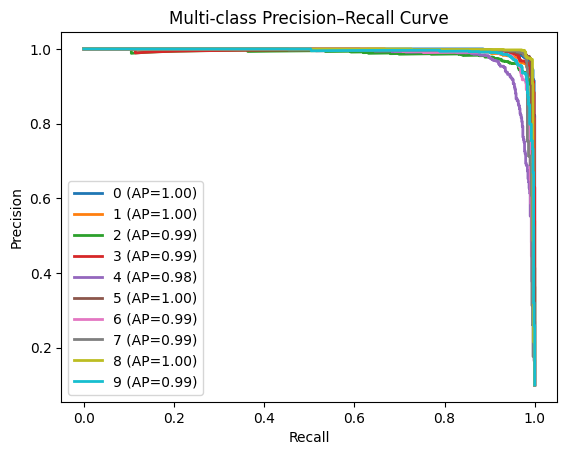

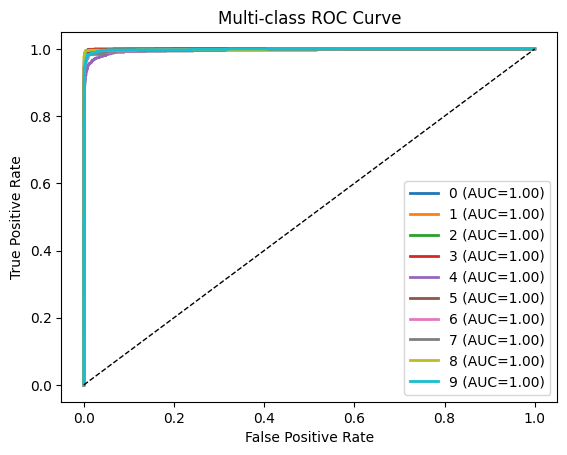


Detailed Classification Report:
              precision    recall  f1-score   support

           0     0.9716    0.9862    0.9788       797
           1     0.9628    0.9749    0.9688       797
           2     0.9505    0.9636    0.9570       797
           3     0.9539    0.9875    0.9704       797
           4     0.9658    0.9210    0.9428       797
           5     0.9717    0.9900    0.9807       797
           6     0.9683    0.9586    0.9634       797
           7     0.9738    0.9799    0.9769       797
           8     0.9949    0.9774    0.9861       797
           9     0.9768    0.9498    0.9631       797

    accuracy                         0.9689      7970
   macro avg     0.9690    0.9689    0.9688      7970
weighted avg     0.9690    0.9689    0.9688      7970



In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize

# 1. Get true labels and predicted probabilities
#    Assumes test_gen_new is a Keras DirectoryIterator or similar
test_labels = np.array(test_gen_new.classes)              # shape (n_samples,)
class_names = list(test_gen_new.class_indices.keys())     # e.g. ['cat','dog',…]
n_classes = len(class_names)

#    Predict on the entire test set
predictions = vit_model.predict(test_gen_new, verbose=1)  # shape (n_samples, n_classes)
predicted_classes = np.argmax(predictions, axis=1)        # shape (n_samples,)

# 2. Binarize the true labels for PR/ROC curves
y_true_bin = label_binarize(test_labels, classes=list(range(n_classes)))  # shape (n_samples, n_classes)

# 3. Define plotting functions

def plot_precision_recall_curve(y_true_bin, y_scores, class_names):
    plt.figure()
    for i, cls in enumerate(class_names):
        precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_scores[:, i])
        ap = auc(recall, precision)
        plt.plot(recall, precision, lw=2, label=f"{cls} (AP={ap:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Multi‑class Precision–Recall Curve")
    plt.legend(loc="best")
    plt.show()

def plot_roc_curve(y_true_bin, y_scores, class_names):
    plt.figure()
    for i, cls in enumerate(class_names):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{cls} (AUC={roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--", lw=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi‑class ROC Curve")
    plt.legend(loc="best")
    plt.show()

# 4. Generate the plots
plot_precision_recall_curve(y_true_bin, predictions, class_names)
plot_roc_curve(y_true_bin, predictions, class_names)

# 5. Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(
    test_labels,
    predicted_classes,
    target_names=class_names,
    digits=4
))


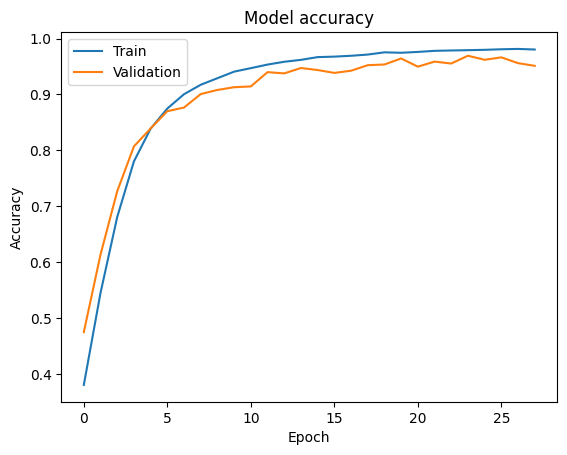

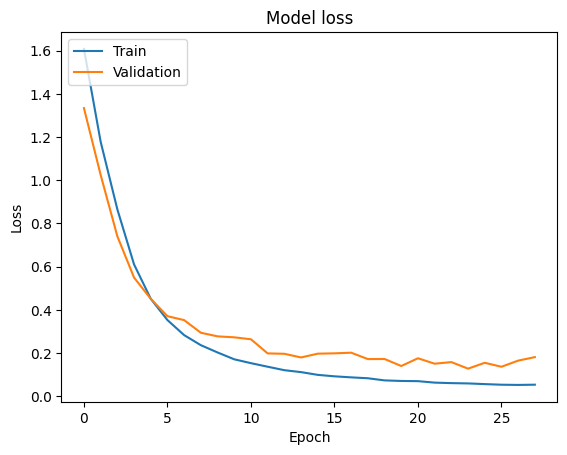

In [39]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
test_labels = test_gen_new.classes
predictions = vit_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

499/499 ━━━━━━━━━━━━━━━━━━━━ 51s 101ms/step


In [41]:
report = classification_report(test_labels, predicted_classes,
target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       797
           1       0.96      0.97      0.97       797
           2       0.95      0.96      0.96       797
           3       0.95      0.99      0.97       797
           4       0.97      0.92      0.94       797
           5       0.97      0.99      0.98       797
           6       0.97      0.96      0.96       797
           7       0.97      0.98      0.98       797
           8       0.99      0.98      0.99       797
           9       0.98      0.95      0.96       797

    accuracy                           0.97      7970
   macro avg       0.97      0.97      0.97      7970
weighted avg       0.97      0.97      0.97      7970



In [43]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

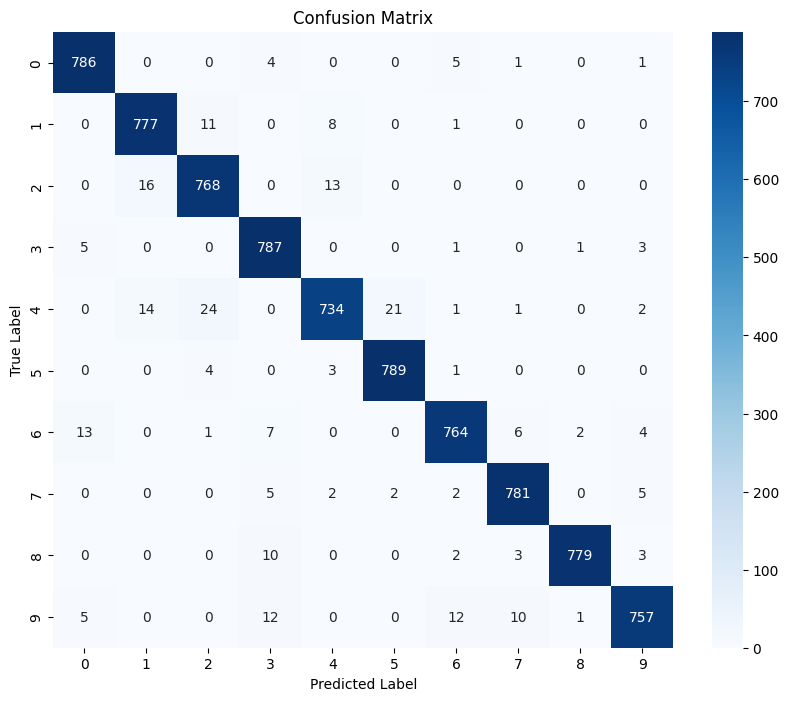

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=list(test_gen_new.class_indices.keys()),
yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
